In [ ]:
# Demo: Knowledge Graph-Guided Random Forest Model

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import networkx as nx
import requests
import io

# Step 2: Load the Dataset
url = 'https://drive.google.com/uc?id=1C-gsA00ANKJdo3iQdv6kchUha9YUZG2d'  # Updated file ID
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print("Dataset Loaded Successfully!")
    # Display the first few rows of the dataset
    print(data.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Dataset Loaded Successfully!
   SACM_ID          FIELD_ID LAB_ID PREV_LAB_ID_1 JOB_ID PREV_JOB_ID_1  \
0    32537    C74_09_580_600    NaN           NaN    NaN           NaN   
1    31160  C12_64_1860_1870    NaN           NaN    NaN           NaN   
2    27155   C08_43_0760_770    NaN           NaN    NaN           NaN   
3    30216   C11_58_0980_990    NaN           NaN    NaN           NaN   
4    28840   C09_50_0860_870    NaN           NaN    NaN           NaN   

                               SUBMITTER  PROJECT_NAME DATE_SUBMITTED  \
0  Dykes, Shaun M., and Wintzer, Niki E.  CUMO Project       1/1/1974   
1  Dykes, Shaun M., and Wintzer, Niki E.  CUMO Project       1/1/2012   
2  Dykes, Shaun M., and Wintzer, Niki E.  CUMO Project       1/1/2008   
3  Dykes, Shaun M., and Wintzer, Niki E.  CUMO Project       1/1/2011   
4  Dykes, Shaun M., and Wintzer, Niki E.  CUMO Project       1/1/2009   

  DATE_COLLECTED  ... Ti_pct Tl_ppm Tm_ppm U_ppm V_ppm  W_ppm  Y_ppm Yb_ppm  \
0       

In [ ]:
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 12.0 MB/s eta 0:00:00


In [ ]:
# Demo: Knowledge Graph Visualization

# Step 1: Import Necessary Libraries
import rdflib
import matplotlib.pyplot as plt
import networkx as nx
import requests
import io
import os
from IPython.display import display
import ipywidgets as widgets

# Step 2: Load the Knowledge Graph (KG) from Google Drive
kg_url = 'https://drive.google.com/uc?id=18zYq2zuWQ_zwf2Uadgz2OXdl9BwLZdHw'
response = requests.get(kg_url)
kg_path = 'geological_knowledge_graph_Cu.ttl'
with open(kg_path, 'wb') as f:
    f.write(response.content)

kg = rdflib.Graph()
kg.parse(kg_path, format='turtle')

# Step 3: Extract Data from the KG for Visualization
def extract_graph_data(kg):
    edges = []
    for subj, pred, obj in kg:
        edges.append((str(subj).split("#")[-1], str(obj).split("#")[-1], str(pred).split("#")[-1]))
    return edges

edges = extract_graph_data(kg)

# Step 4: Function to Visualize the Knowledge Graph
def visualize_kg(edges, selected_deposit=None):
    G = nx.DiGraph()

    # Filter edges based on the selected deposit type, if provided
    if selected_deposit:
        edges = [edge for edge in edges if selected_deposit == edge[0]]

    # Add edges to the graph
    for subj, obj, pred in edges:
        G.add_edge(subj, obj, label=pred)

    # Define edge colors based on relationship types
    edge_colors = {
        "hasElement": "blue",
        "hasMineral": "green",
        "hasRockType": "orange",
        "hasTectonicSetting": "purple",
        "hasAssociatedDeposit": "red",
    }

    # Assign colors to edges
    edge_color_list = [edge_colors.get(data[2], "gray") for data in edges]

    pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust k for spacing
    plt.figure(figsize=(15, 10))

    # Draw nodes and edges
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=4000,
        node_color="lightblue",
        font_size=12,
        font_weight="bold",
        edge_color=edge_color_list,
    )

    # Add edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color=color, lw=2, label=rel)
        for rel, color in edge_colors.items()
    ]
    plt.legend(
        handles=legend_elements,
        loc="upper right",
        fontsize=10,
        title="Relationships",
    )

    title = f"Knowledge Graph for {selected_deposit}" if selected_deposit else "Knowledge Graph"
    plt.title(title, fontsize=16)
    plt.show()



Displaying the full Knowledge Graph:


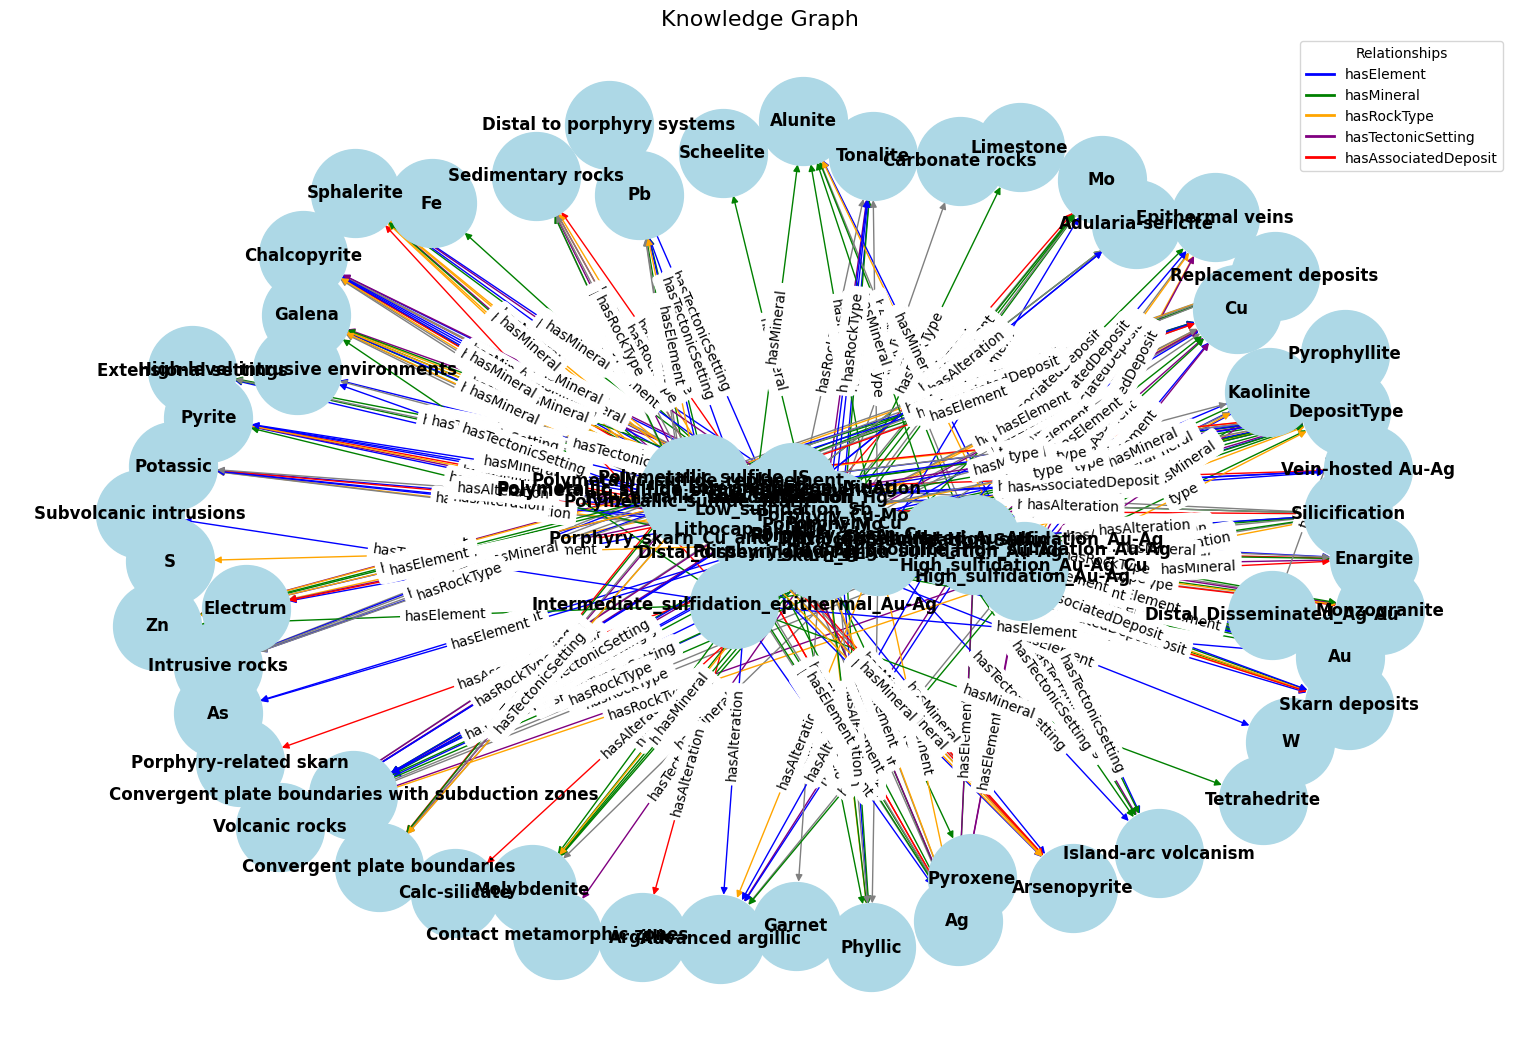

In [ ]:
# Step 5: Display the Full Knowledge Graph
print("Displaying the full Knowledge Graph:")
visualize_kg(edges)



Select a deposit type to visualize its part of the Knowledge Graph:


Dropdown(description='Deposit:', options=(None, 'Distal_Disseminated_Ag-Au', 'Distal_disseminated_Ag-Au', 'Hig…

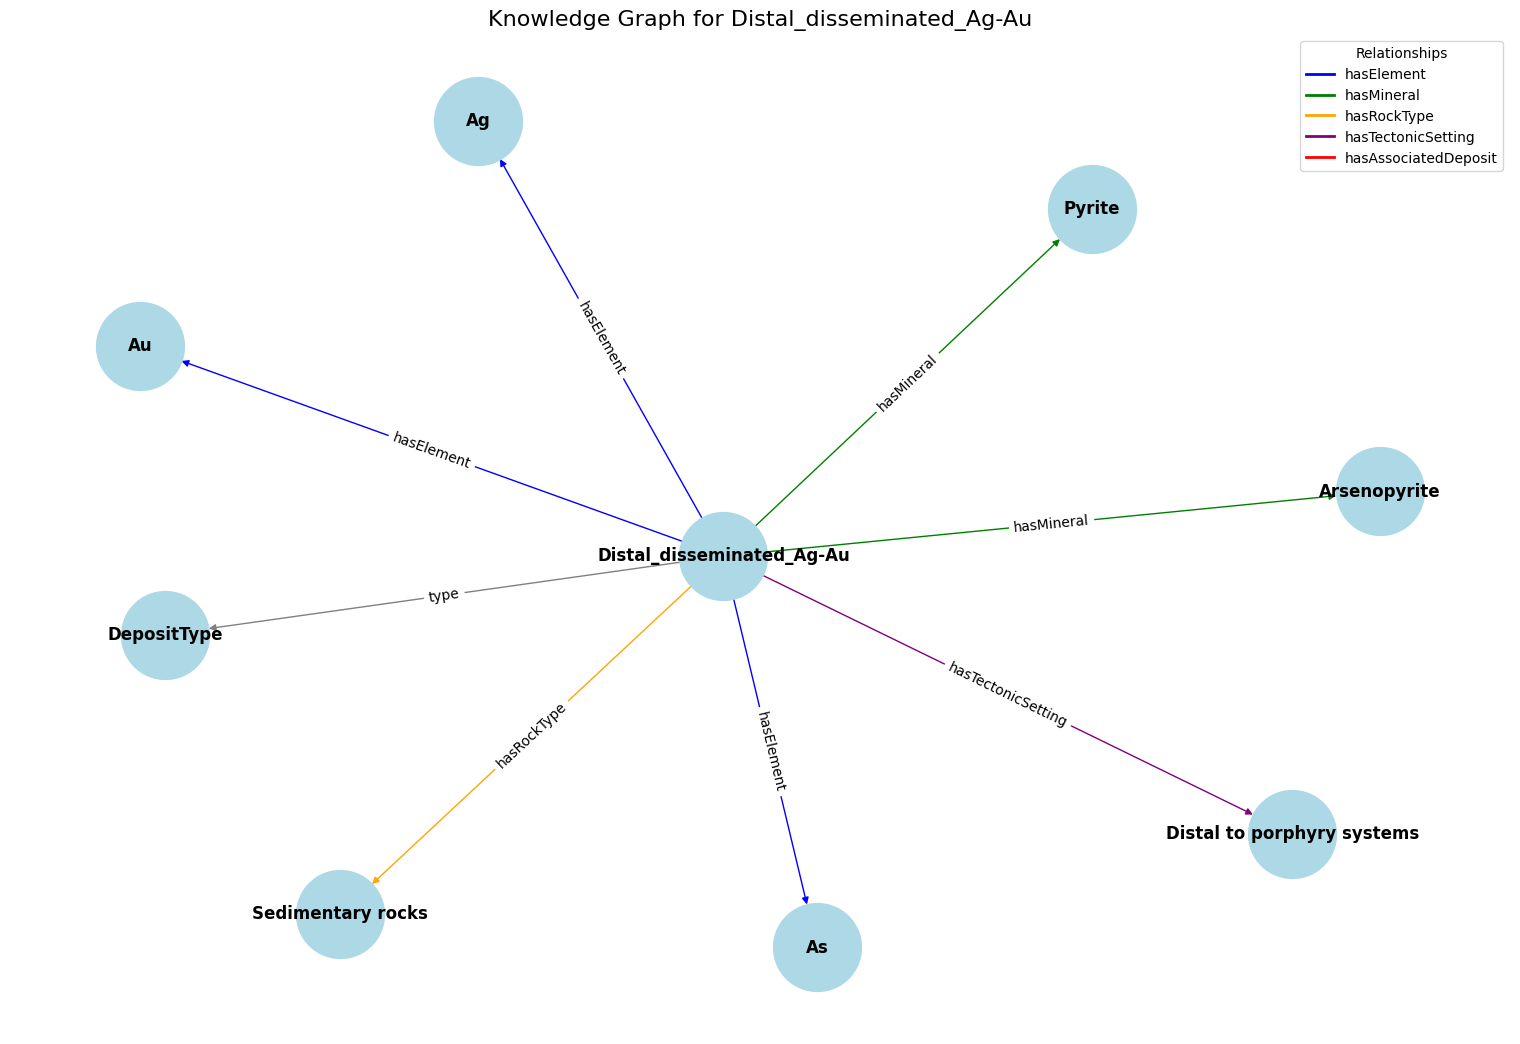

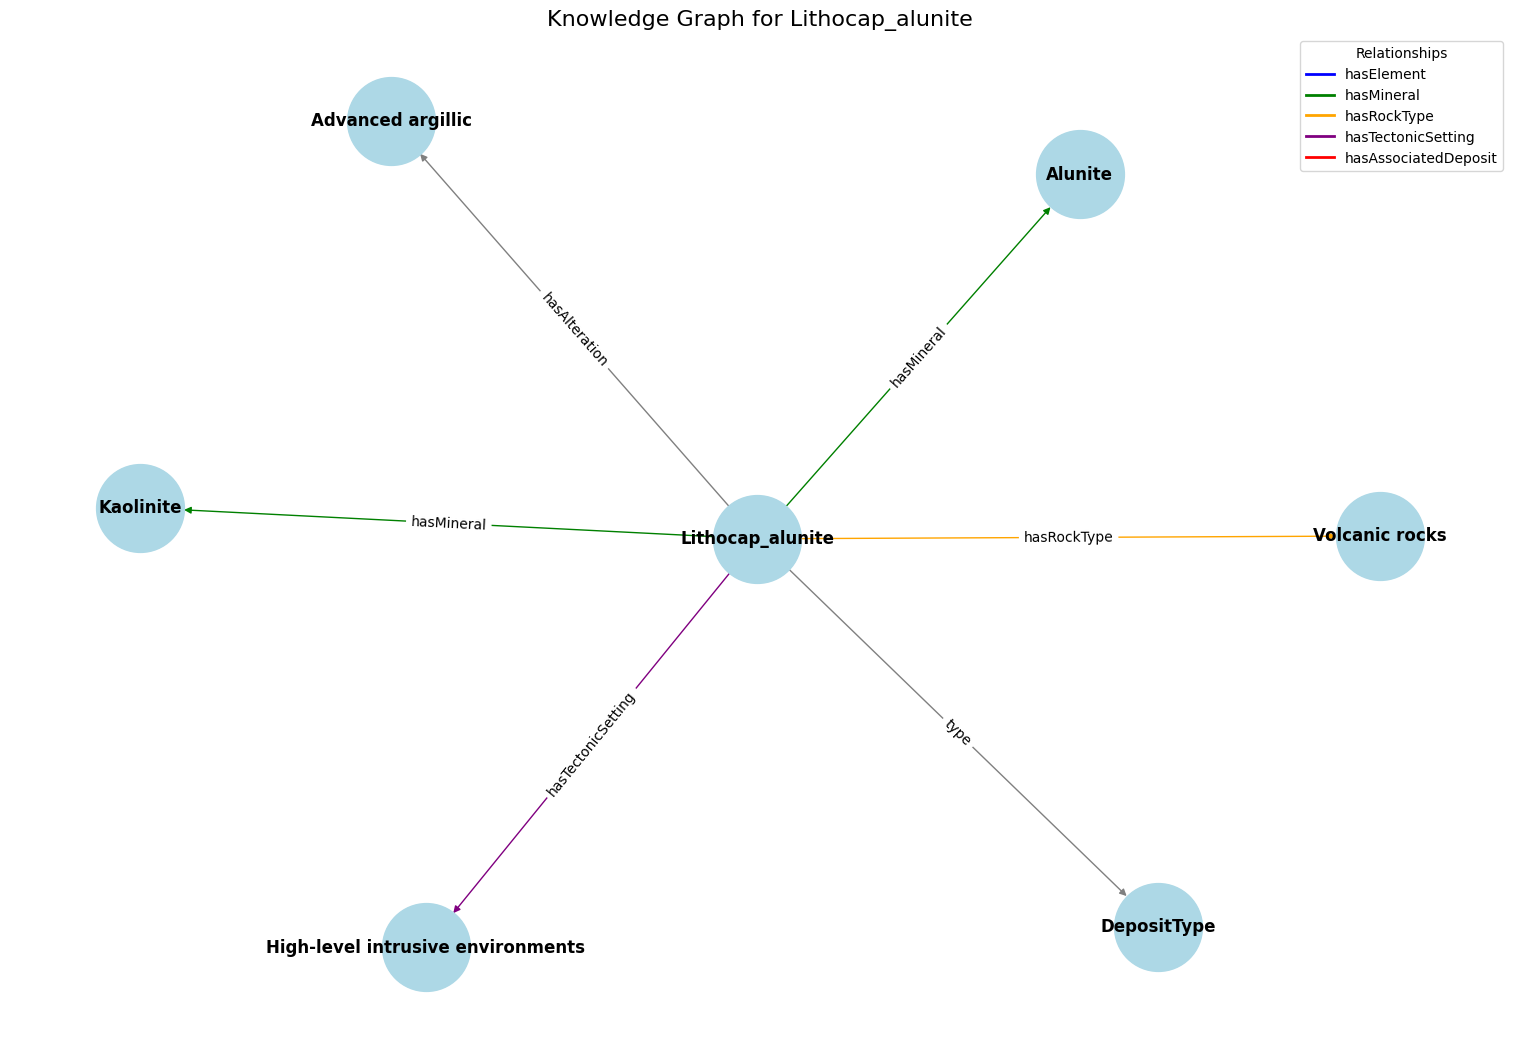

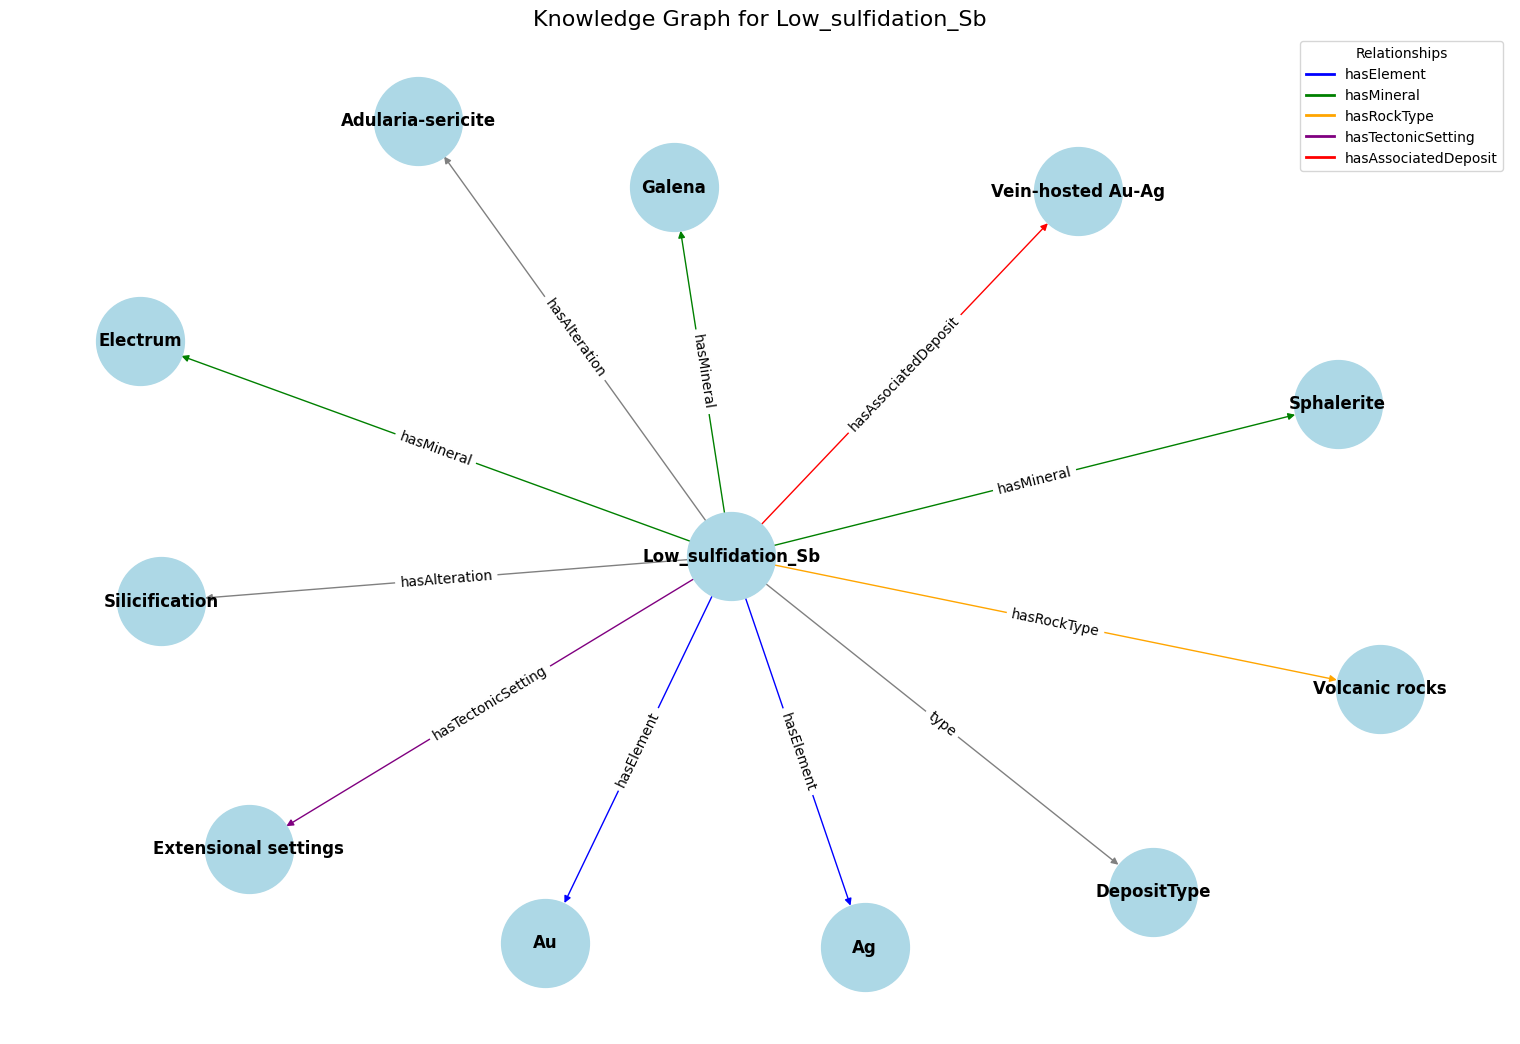

In [ ]:
# Step 6: Interactive Dropdown for Deposit Type Selection
def get_deposit_types(edges):
    deposit_types = sorted(set(subj for subj, _, _ in edges))  # Simplify labels
    return deposit_types

def on_deposit_type_change(change):
    selected_deposit = change['new']
    if selected_deposit:
        visualize_kg(edges, selected_deposit=selected_deposit)

deposit_types = get_deposit_types(edges)
deposit_dropdown = widgets.Dropdown(
    options=[None] + deposit_types,
    value=None,
    description='Deposit:',
    style={'description_width': 'initial'},
)
deposit_dropdown.observe(on_deposit_type_change, names='value')

print("Select a deposit type to visualize its part of the Knowledge Graph:")
display(deposit_dropdown)

# Cleanup: Remove the temporary KG file
if os.path.exists(kg_path):
    os.remove(kg_path)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Columns to be used as features for prediction
selected_columns = [
    'Ag_ppm', 'Al_pct', 'As_ppm', 'Au_ppm', 'B_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Br_ppm',
    'C_pct', 'Ca_pct', 'Cd_ppm', 'Ce_ppm', 'Cl_pct', 'Co_ppm', 'Cr_ppm', 'Cs_ppm', 'Cu_ppm',
    'Dy_ppm', 'Er_ppm', 'Eu_ppm', 'F_pct', 'Fe_pct', 'Ga_ppm', 'Gd_ppm', 'Ge_ppm', 'Hf_ppm',
    'Hg_ppm', 'Ho_ppm', 'In_ppm', 'Ir_ppm', 'K_pct', 'La_ppm', 'Li_ppm', 'Lu_ppm', 'Mg_pct',
    'Mn_pct', 'Mo_ppm', 'Na_pct', 'Nb_ppm', 'Nd_ppm', 'Ni_ppm', 'P_pct', 'Pb_ppm', 'Pd_ppm',
    'Pr_ppm', 'Pt_ppm', 'Rb_ppm', 'Re_ppm', 'Rh_ppm', 'Ru_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm',
    'Se_ppm', 'Si_pct', 'Sm_ppm', 'Sn_ppm', 'Sr_ppm', 'Ta_ppm', 'Tb_ppm', 'Te_ppm', 'Th_ppm',
    'Ti_pct', 'Tl_ppm', 'Tm_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Y_ppm', 'Yb_ppm', 'Zn_ppm', 'Zr_ppm'
]


# Common Preprocessing Steps
def preprocess_data(data, selected_columns, rare_threshold=2):
    # Extract selected features and target
    features = data[selected_columns]
    target = data['DEPOSIT_TYPE']

    # Merge rare classes into "Other"
    target_counts = target.value_counts()
    rare_classes = target_counts[target_counts < rare_threshold].index
    target = target.replace(rare_classes, "Other")

    # Handle non-numeric columns by encoding them
    label_encoders = {}
    for column in features.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column])
        label_encoders[column] = le

    # Handle missing values (fill numeric columns with mean)
    numeric_features = features.select_dtypes(include=[np.number])
    features[numeric_features.columns] = numeric_features.fillna(numeric_features.mean())

    # Standardize numeric features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, target


# Split data into train/test/validation sets
def split_data(features, target, test_size=0.3, random_state=25):
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=test_size, random_state=random_state)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)
    return X_train, X_test, X_val, y_train, y_test, y_val


# Knowledge-based Feature Engineering for Model 2
def add_knowledge_features_model2(df):
    df['kb_porphyry_cu_potential'] = ((df['Cu_ppm'] > 200) & (df['Mo_ppm'] > 10) & (df['K_pct'] > 2)).astype(int)
    df['kb_skarn_related_potential'] = ((df['W_ppm'] > 10) | (df['Fe_pct'] > 10) | (df['Ca_pct'] > 5)).astype(int)
    df['kb_high_sulfidation_potential'] = ((df['Cu_ppm'] > 500) & (df['Au_ppm'] > 0.1)).astype(int)
    df['kb_low_sulfidation_potential'] = ((df['Ag_ppm'] > 50) & (df['Au_ppm'] > 0.05)).astype(int)
    return df


# Knowledge-based Feature Engineering for Model 3
def add_knowledge_features_model3(df):
    df = add_knowledge_features_model2(df)
    df['porphyry_cu_mo_potential'] = ((df['Cu_ppm'] > 300) & (df['Mo_ppm'] > 15)).astype(int)
    df['lithocap_potential'] = ((df['Al_pct'] > 5) & (df['K_pct'] > 1)).astype(int)
    df['polymetallic_sulfide_potential'] = ((df['Pb_ppm'] > 100) & (df['Zn_ppm'] > 100) & (df['Ag_ppm'] > 10)).astype(int)
    df['intermediate_sulfidation_potential'] = ((df['Zn_ppm'] > 50) & (df['Au_ppm'] > 0.05) & (df['Cu_ppm'] > 100)).astype(int)
    df['distal_disseminated_potential'] = ((df['Ag_ppm'] > 30) & (df['As_ppm'] > 50)).astype(int)
    df['high_alumina_alteration'] = ((df['Al_pct'] > 8) & (df['Si_pct'] > 10)).astype(int)
    df['low_sulfidation_sb_potential'] = (df['Sb_ppm'] > 10).astype(int)
    df['skarn_w_potential'] = ((df['W_ppm'] > 20) & (df['Fe_pct'] > 5)).astype(int)
    df['high_sulfidation_sulfur_potential'] = (df['S_pct'] > 5).astype(int)
    df['porphyry_cu_au_potential'] = ((df['Cu_ppm'] > 300) & (df['Au_ppm'] > 0.15)).astype(int)
    return df

# Feature Importance Evaluation with Prefixed Feature Names
def evaluate_model_with_prefixed_features(
    model, X_train, y_train_encoded, X_test, y_test_encoded, X_val, y_val_encoded, feature_names=None
):
    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    print(f"Model Accuracy (Training Set): {train_accuracy}")
    print("Classification Report (Training Set):")
    print(
        classification_report(
            y_train_encoded, y_train_pred,
            labels=np.unique(y_train_encoded),
            target_names=target_encoder.inverse_transform(np.unique(y_train_encoded)),
        )
    )

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
    print(f"Model Accuracy (Test Set): {test_accuracy}")
    print("Classification Report (Test Set):")
    print(
        classification_report(
            y_test_encoded, y_test_pred,
            labels=np.unique(y_test_encoded),
            target_names=target_encoder.inverse_transform(np.unique(y_test_encoded)),
        )
    )

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
    print(f"Model Accuracy (Validation Set): {val_accuracy}")
    print("Classification Report (Validation Set):")
    print(
        classification_report(
            y_val_encoded, y_val_pred,
            labels=np.unique(y_val_encoded),
            target_names=target_encoder.inverse_transform(np.unique(y_val_encoded)),
        )
    )

    # Feature importance (if applicable)
    if feature_names is not None and hasattr(model, "feature_importances_"):
        feature_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("Top 10 Feature Importances:")
        print(feature_importances.head(10))


In [ ]:
# Model 1: No Knowledge-Based Features
features_scaled, target = preprocess_data(data, selected_columns)
X_train, X_test, X_val, y_train, y_test, y_val = split_data(features_scaled, target)

# Encode targets
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)
y_val_encoded = target_encoder.transform(y_val)

# Train RandomForest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=33, class_weight='balanced')
rf_clf.fit(X_train, y_train_encoded)

# Evaluate Model 1
evaluate_model_with_prefixed_features(
    rf_clf, X_train, y_train_encoded, X_test, y_test_encoded, X_val, y_val_encoded, feature_names=selected_columns
)


<ipython-input-9-3a5cf4201cb2>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numeric_features.columns] = numeric_features.fillna(numeric_features.mean())
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Model Accuracy (Training Set): 1.0
Classification Report (Training Set):
                                                 precision    recall  f1-score   support

                      Distal Disseminated Ag-Au       1.00      1.00      1.00         9
                      Distal disseminated Ag-Au       1.00      1.00      1.00         4
                         High sulfidation Au-Ag       1.00      1.00      1.00        76
                    High sulfidation Au-Ag (Cu)       1.00      1.00      1.00        16
      Intermediate sulfidation epithermal Au-Ag       1.00      1.00      1.00         2
                               Lithocap alunite       1.00      1.00      1.00        73
        Lithocap alunite/High sulfidation Au-Ag       1.00      1.00      1.00        68
      Lithocap kaolinite/High sulfidation Au-Ag       1.00      1.00      1.00        49
                                Low sulfidation       1.00      1.00      1.00        68
                          Low sulfid

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Model 2: Add Limited Knowledge-Based Features
features_knowledge = add_knowledge_features_model2(pd.DataFrame(features_scaled, columns=selected_columns))
combined_features = np.concatenate([features_scaled, features_knowledge.values], axis=1)
X_train, X_test, X_val, y_train, y_test, y_val = split_data(combined_features, target)

# Train RandomForest model
rf_clf.fit(X_train, y_train_encoded)

# Evaluate Model 2
feature_names_model2 = [f"original_{col}" for col in selected_columns] + [f"knowledge_{col}" for col in features_knowledge.columns]
evaluate_model_with_prefixed_features(
    rf_clf, X_train, y_train_encoded, X_test, y_test_encoded, X_val, y_val_encoded, feature_names=feature_names_model2
)


Model Accuracy (Training Set): 1.0
Classification Report (Training Set):
                                                 precision    recall  f1-score   support

                      Distal Disseminated Ag-Au       1.00      1.00      1.00         9
                      Distal disseminated Ag-Au       1.00      1.00      1.00         4
                         High sulfidation Au-Ag       1.00      1.00      1.00        76
                    High sulfidation Au-Ag (Cu)       1.00      1.00      1.00        16
      Intermediate sulfidation epithermal Au-Ag       1.00      1.00      1.00         2
                               Lithocap alunite       1.00      1.00      1.00        73
        Lithocap alunite/High sulfidation Au-Ag       1.00      1.00      1.00        68
      Lithocap kaolinite/High sulfidation Au-Ag       1.00      1.00      1.00        49
                                Low sulfidation       1.00      1.00      1.00        68
                          Low sulfid

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Model 3: Add All Knowledge-Based Features
features_knowledge = add_knowledge_features_model3(pd.DataFrame(features_scaled, columns=selected_columns))
combined_features = np.concatenate([features_scaled, features_knowledge.values], axis=1)
X_train, X_test, X_val, y_train, y_test, y_val = split_data(combined_features, target)

# Train RandomForest model
rf_clf.fit(X_train, y_train_encoded)

# Evaluate Model 3
feature_names_model3 = [f"original_{col}" for col in selected_columns] + [f"knowledge_{col}" for col in features_knowledge.columns]
evaluate_model_with_prefixed_features(
    rf_clf, X_train, y_train_encoded, X_test, y_test_encoded, X_val, y_val_encoded, feature_names=feature_names_model3
)

Model Accuracy (Training Set): 1.0
Classification Report (Training Set):
                                                 precision    recall  f1-score   support

                      Distal Disseminated Ag-Au       1.00      1.00      1.00         9
                      Distal disseminated Ag-Au       1.00      1.00      1.00         4
                         High sulfidation Au-Ag       1.00      1.00      1.00        76
                    High sulfidation Au-Ag (Cu)       1.00      1.00      1.00        16
      Intermediate sulfidation epithermal Au-Ag       1.00      1.00      1.00         2
                               Lithocap alunite       1.00      1.00      1.00        73
        Lithocap alunite/High sulfidation Au-Ag       1.00      1.00      1.00        68
      Lithocap kaolinite/High sulfidation Au-Ag       1.00      1.00      1.00        49
                                Low sulfidation       1.00      1.00      1.00        68
                          Low sulfid

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
